In [29]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plot_scatters_of_fit(clf_fit):
    fig, ax = plt.subplots(1,3, figsize = (20, 8))
    sns.scatterplot(X_test[:, 0], X_test[:, 1],
                    y_test, ax = ax[0])
    sns.scatterplot(X_test[:, 0], X_test[:, 1],
                    clf_fit.predict(X_test), ax = ax[1])
    sns.scatterplot(X_test[:, 0], X_test[:, 1],
                    clf_fit.predict(X_test) == y_test, ax = ax[2])

    for axes, title_ in zip(ax, ['True classes', 'Predicted classes', 'Correct-incorrect classification']):
        axes.set_title(title_)
        axes.legend(loc = 1, prop = {'size': 15})
        
    return None

In [3]:
data = make_circles(n_samples=10000, noise=0.075, random_state=101)

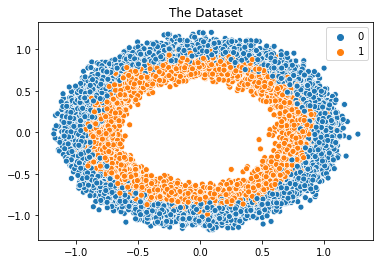

In [4]:
sns.scatterplot(data[0][:, 0], data[0][:, 1], data[1])
plt.title('The Dataset')
plt.show()

In [5]:
X = data[0]
y = data[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Text(0.5, 1.0, 'Train set')

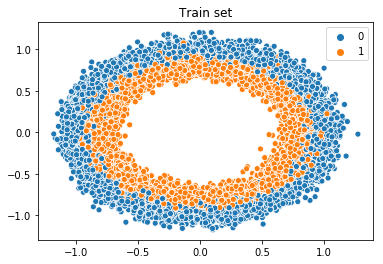

In [6]:
sns.scatterplot(X_train[:, 0], X_train[:, 1], y_train)
plt.title('Train set')

Text(0.5, 1.0, 'Test set')

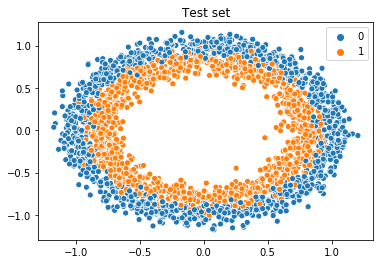

In [7]:
sns.scatterplot(X_test[:, 0], X_test[:, 1], y_test)
plt.title('Test set')

## SIMPLE DECISION TREE

In [8]:
base_tree = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=101)
base_tree_fit = base_tree.fit(X_train, y_train)

In [30]:
f1_score(y_train, base_tree_fit.predict(X_train))

0.695817129849189

In [31]:
f1_score(y_test, base_tree_fit.predict(X_test))

0.6965787997756591

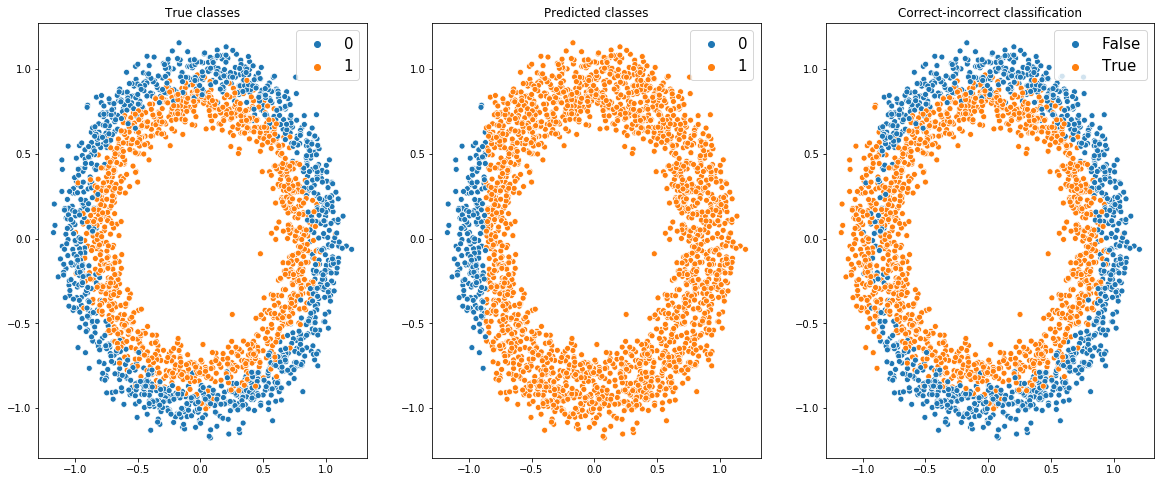

In [11]:
plot_scatters_of_fit(base_tree_fit)

## BAGGING

In [12]:
baggingclass = BaggingClassifier(base_tree, 100, random_state=101)
baggingclass_fit = baggingclass.fit(X_train, y_train)

In [33]:
f1_score(y_train, baggingclass_fit.predict(X_train))

0.7287498730577842

In [34]:
f1_score(y_test, baggingclass_fit.predict(X_test))

0.7342615012106538

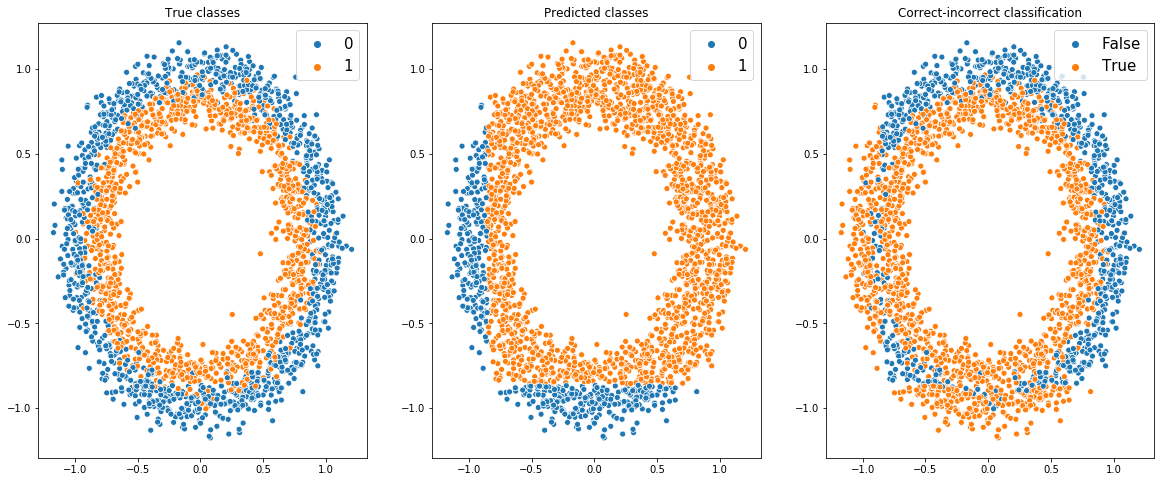

In [15]:
plot_scatters_of_fit(baggingclass_fit)

## RANDOM FOREST

In [16]:
# a special case for bagging
randomforest = RandomForestClassifier(100, criterion='gini', max_depth=1, random_state=101)
randomforest_fit = randomforest.fit(X_train, y_train)

In [36]:
f1_score(y_train, randomforest_fit.predict(X_train))

0.7658643326039387

In [38]:
f1_score(y_test, randomforest_fit.predict(X_test))

0.7736033975824893

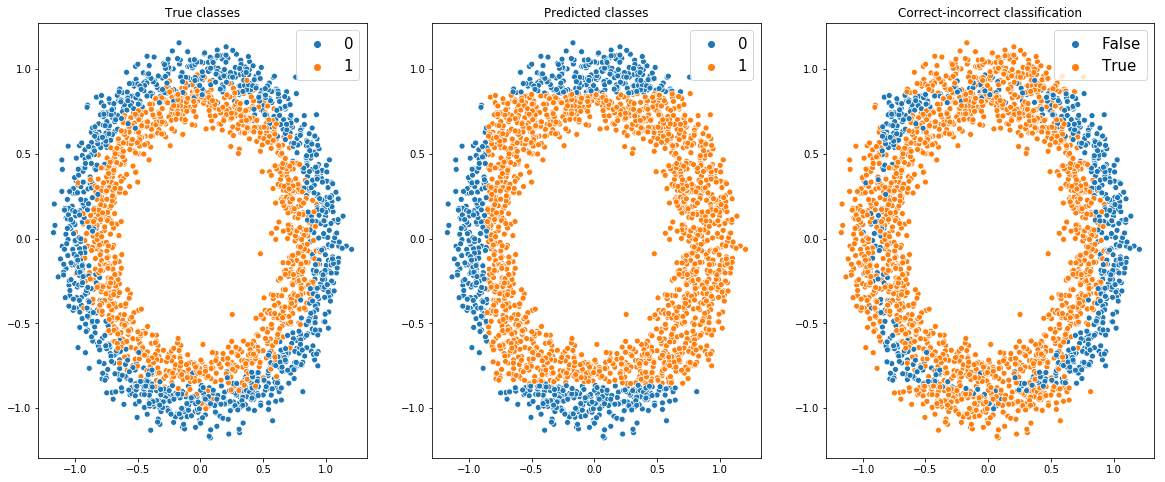

In [19]:
plot_scatters_of_fit(randomforest_fit)

### RANDOM FOREST AS BAGGING CLASSIFIER

In [20]:
random_forest_mod = RandomForestClassifier(100, criterion='gini', max_depth=1, random_state=101, max_features=1.0)

In [21]:
random_forest_modfit = random_forest_mod.fit(X_train, y_train)

In [41]:
f1_score(y_train, random_forest_modfit.predict(X_train))

0.7287498730577842

In [40]:
f1_score(y_test, random_forest_modfit.predict(X_test))

0.7342615012106538

In [42]:
f1_score(y_train, random_forest_modfit.predict(X_train)) == f1_score(y_train, baggingclass_fit.predict(X_train))

True

## BOOSTING

In [25]:
adaboost = AdaBoostClassifier(base_tree, 100, random_state=101)
adaboost_fit = adaboost.fit(X_train, y_train)

In [45]:
f1_score(y_train, adaboost_fit.predict(X_train))

0.9007045061810448

In [44]:
f1_score(y_test, adaboost_fit.predict(X_test))

0.9016459253311923

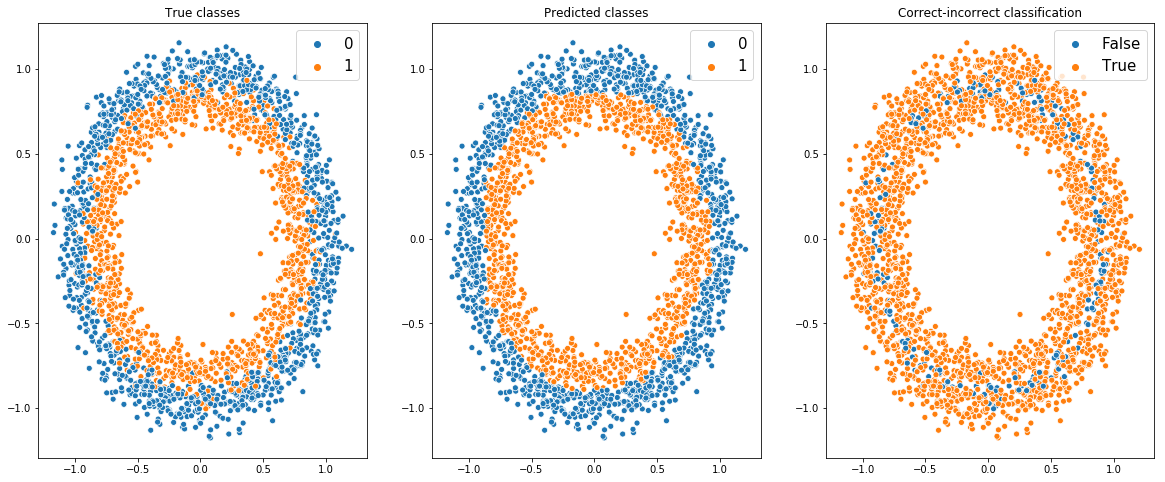

In [28]:
plot_scatters_of_fit(adaboost_fit)